In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
print(train.shape)

(1460, 81)


In [3]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
train=train[0:5000]

def compare_columns(df1, df2):
    df1_columns_set = set(df1.columns)
    df2_columns_set = set(df2.columns)
    print('df1_columns_set - df2_columns_set :', df1_columns_set - df2_columns_set)
    print('df2_columns_set - df1_columns_set :', df2_columns_set - df1_columns_set)
    
    
train["LogSalePrice"] = train['SalePrice'].apply(np.log)

def calc_percent_missing(df):
    nan_percent = {col : df[col].isnull().mean() for col in df.columns}
    return nan_percent

nan_percent = calc_percent_missing(train)
nan_percent = pd.DataFrame(sorted(nan_percent.items(), key=lambda x: x[1], reverse=True))
nan_percent = nan_percent[nan_percent[1] >= 0.005]

/tmp/ipykernel_19/416843868.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["LogSalePrice"] = train['SalePrice'].apply(np.log)


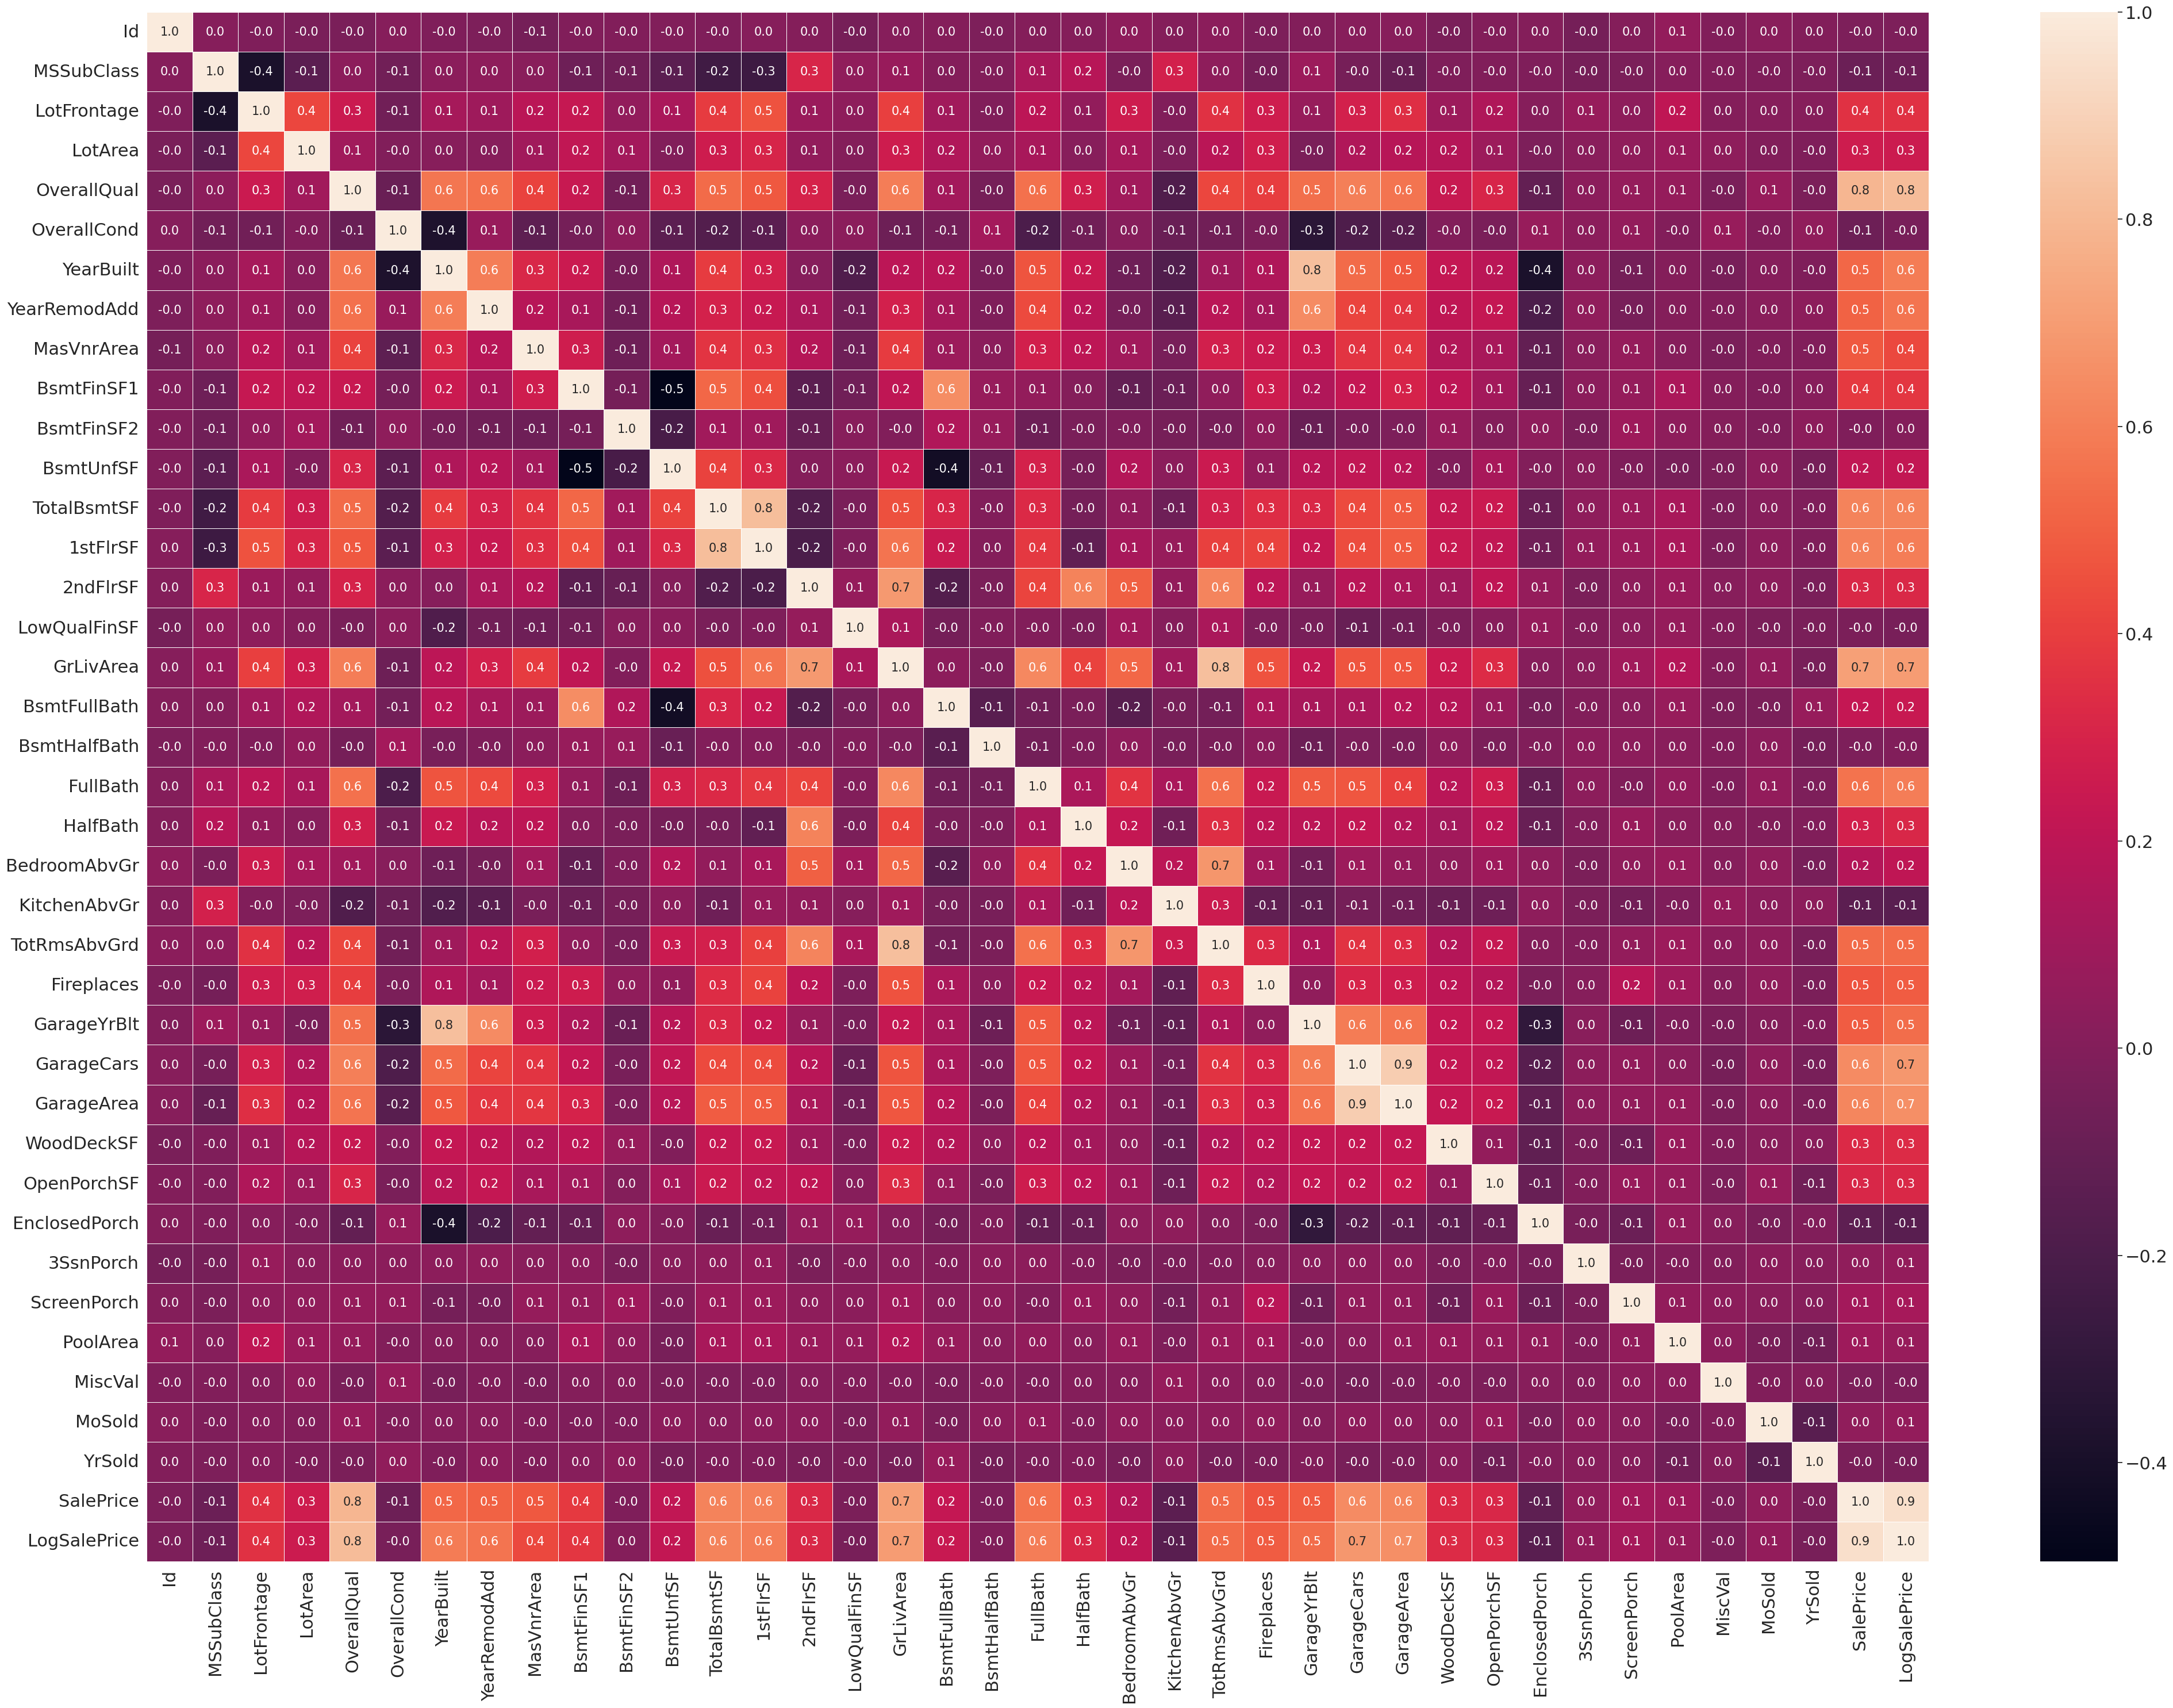

In [7]:
correlation_train=train[train.dtypes[train.dtypes != 'object'].index].corr()
sns.set(font_scale=2)
plt.figure(figsize = (50,35))
ax = sns.heatmap(correlation_train, annot=True,annot_kws={"size": 15},fmt='.1f', linewidths=.5)

In [8]:
num_cols = [col for col in train.columns if train[col].dtype in ["float16","float32","float64", "int64", "int32"]]
cat_cols = [col for col in train.columns if train[col].dtype not in ["float16","float32","float64", "int64", "int32"]]
                                                                     
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageCond,81,0.055479


In [9]:
df_train = train.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0)
df_test = test.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0)
def replace_nan_values(df):
    for col in df:
        df[col] = df[col].fillna(df[col].mode()[0])
replace_nan_values(df_train)
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Id,0,0.0
GarageCars,0,0.0
GarageYrBlt,0,0.0
GarageType,0,0.0
FireplaceQu,0,0.0
Fireplaces,0,0.0
Functional,0,0.0
TotRmsAbvGrd,0,0.0
KitchenQual,0,0.0
KitchenAbvGr,0,0.0


In [10]:
compare_columns(df_train,df_test)

df1_columns_set - df2_columns_set : {'SalePrice', 'LogSalePrice'}
df2_columns_set - df1_columns_set : set()


In [11]:
data = df_train.drop(columns=['SalePrice', 'LogSalePrice'])
compare_columns(data,df_test)

df1_columns_set - df2_columns_set : set()
df2_columns_set - df1_columns_set : set()


In [12]:
data_train_test = pd.concat([data, df_test])
data_train_test["SqFtPerRoom"] = data_train_test["GrLivArea"] / (data_train_test["TotRmsAbvGrd"] + data_train_test["FullBath"] + data_train_test["HalfBath"] + data_train_test["KitchenAbvGr"])
data_train_test['Total_Home_Quality'] = data_train_test['OverallQual'] + data_train_test['OverallCond']
data_train_test['Total_Bathrooms'] = data_train_test['FullBath'] + 0.5 * data_train_test['HalfBath'] + data_train_test['BsmtFullBath'] + 0.5 * data_train_test['BsmtHalfBath']
data_train_test["HighQualSF"] = data_train_test["1stFlrSF"] + data_train_test["2ndFlrSF"]
data_train_test = pd.get_dummies(data_train_test)
data, df_test = data_train_test[:len(data)], data_train_test[len(data):]
target = df_train['LogSalePrice']
test_id = df_test['Id']
from sklearn.model_selection import RepeatedKFold, KFold, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV

# 5 Fold Cross validation
kf = KFold(n_splits=5, shuffle=True)
cv_scores, cv_std = [], []
def rmse(model):
    return np.sqrt(-cross_val_score(model, data, target, scoring="neg_mean_squared_error", cv=kf))
def apply_learning_algorithm(model):
    score = rmse(model)
    cv_scores.append(score.mean())
    cv_std.append(score.std())

In [13]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error

# 5 Fold Cross validation
kf = KFold(n_splits=5, shuffle=True)

# RMSE Calculation Function
def rmse(model, X, y):
    return np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kf))

# XGBoost Regressor with Hyperparameter Tuning
regressor = xgb.XGBRegressor()

# Hyperparameters Grid
# Hyperparameters Grid adjusted for gbtree booster only
hyperparameter_grid = {
    'n_estimators': [100, 500, 900, 1100, 1500],
    'max_depth': [2, 3, 5, 10, 15],
    'learning_rate': [0.05, 0.1, 0.15, 0.20],
    'min_child_weight': [1, 2, 3, 4],
    'booster': ['gbtree'],  # using gbtree only
    'base_score': [0.25, 0.5, 0.75, 1]
}


# Randomized Search
random_cv = RandomizedSearchCV(estimator=regressor,
                               param_distributions=hyperparameter_grid,
                               cv=5, n_iter=50,
                               scoring='neg_mean_absolute_error',
                               n_jobs=4, verbose=5,
                               return_train_score=True,
                               random_state=42)

# Splitting Data
x_train, x_validation, y_train, y_validation = train_test_split(data, target, test_size=0.1)

# Fitting the Model
random_cv.fit(x_train, y_train)

# Best Estimator
best_regressor = random_cv.best_estimator_

# Predictions and Evaluation
preds = best_regressor.predict(x_validation)
rmse_value = rmse(best_regressor, x_validation, y_validation)

print(f"RMSE: {rmse_value}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END base_score=0.5, booster=gbtree, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=500;, score=(train=-0.025, test=-0.089) total time=   3.2s
[CV 5/5] END base_score=0.5, booster=gbtree, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=500;, score=(train=-0.026, test=-0.082) total time=   3.1s
[CV 4/5] END base_score=0.25, booster=gbtree, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=1500;, score=(train=-0.001, test=-0.091) total time=   8.2s
[CV 3/5] END base_score=0.25, booster=gbtree, learning_rate=0.1, max_depth=10, min_child_weight=2, n_estimators=1100;, score=(train=-0.001, test=-0.086) total time=   8.3s
[CV 5/5] END base_score=0.25, booster=gbtree, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=100;, score=(train=-0.062, test=-0.087) total time=   0.8s
[CV 2/5] END base_score=0.75, booster=gbtree, learning_rate=0.1, max_depth=3, min_child

In [14]:
# Assuming df_test is your test dataset and test_id contains the IDs for the test dataset
test_pred = best_regressor.predict(df_test)  # Use the best model from RandomizedSearchCV

# If your model's target variable was log-transformed (as indicated by np.expm1), reverse the transformation
test_pred = np.expm1(test_pred)

# Create a submission DataFrame
submission = pd.DataFrame({'Id': test_id, 'SalePrice': test_pred})

# Display the first few rows of the submission file
print(submission.head())

# Save the DataFrame to a CSV file
submission.to_csv("submission.csv", index=False, header=True)

     Id      SalePrice
0  1461  126121.320312
1  1462  166793.859375
2  1463  192018.437500
3  1464  195814.453125
4  1465  180205.750000
